In [1]:
import os
import glob
import subprocess
import sys
import time
from IPython.display import display, Image
import matplotlib.pyplot as plt
from os.path import expanduser

# ${HOME} path
home = expanduser('~')

# isofit GitHub location
github = 'Data/GitHub/isofit_docker'
github_path = ''.join([os.path.join(home,github)])
print(github_path)

# output path
output_dir = 'isofit_output'
output_path = ''.join([os.path.join(home,'scratch/',output_dir),'/'])
os.makedirs(os.path.dirname(output_path), exist_ok=True)
print(output_path)

/Users/sserbin/Data/GitHub/isofit_docker
/Users/sserbin/scratch/isofit_output/


In [2]:
# Grab isofit_prosaild Docker container
os.system("docker pull serbinsh/isofit_containers:isofit_prosaild_master_latest")

0

In [3]:
# Setup isofit run options and inputs
docker_name = "serbinsh/isofit_containers:isofit_prosaild_master_latest"
host_output_dir = output_path
docker_output_dir = "/isofit/examples/20171108_Pasadena/"
print(''.join([host_output_dir,":",docker_output_dir]))
#
# host script dir
host_scripts = ''.join([github_path,"/examples"])
print(host_scripts)
#
# docker script dir
docker_scripts = '/tmp/'
#
# run command
run_command = ''.join(["/bin/sh -c ","'cd ",docker_scripts," && ./run_example_libradtran.sh'"])
print(run_command)

/Users/sserbin/scratch/isofit_output/:/isofit/examples/20171108_Pasadena/
/Users/sserbin/Data/GitHub/isofit_docker/examples
/bin/sh -c 'cd /tmp/ && ./run_example_libradtran.sh'


In [12]:
# Setup full run call
run = ''.join(["docker run --user isofit -v ",host_output_dir,":",docker_output_dir,"output -v ", host_output_dir,"/images:",docker_output_dir,"images -v ",host_output_dir,"/lut:",docker_output_dir,"lut -v ",host_scripts,":",docker_scripts," ",docker_name," ",run_command])
print(run)

# create output images directories for each case
if not os.path.exists(''.join([host_output_dir,"/images/horse/"])):
    os.makedirs(''.join([host_output_dir,"/images/horse/"]))
if not os.path.exists(''.join([host_output_dir,"/images/beckmanlawn/"])):
    os.makedirs(''.join([host_output_dir,"/images/beckmanlawn/"]))    

docker run --user isofit -v /Users/sserbin/scratch/isofit_output/:/isofit/examples/20171108_Pasadena/output -v /Users/sserbin/scratch/isofit_output//images:/isofit/examples/20171108_Pasadena/images -v /Users/sserbin/scratch/isofit_output//lut:/isofit/examples/20171108_Pasadena/lut -v /Users/sserbin/Data/GitHub/isofit_docker/examples:/tmp/ serbinsh/isofit_containers:isofit_prosaild_master_latest /bin/sh -c 'cd /tmp/ && ./run_example_libradtran.sh'


In [13]:
# Run isofit
start = time.time()
# run the docker container
os.system(run)
# get runtime
end = time.time()
#Print runtime
print(end - start)

66.82722687721252


In [14]:
# show output frames
images_dir = os.path.join(output_path,'images','horse')
print(images_dir)

/Users/sserbin/scratch/isofit_output/images/horse


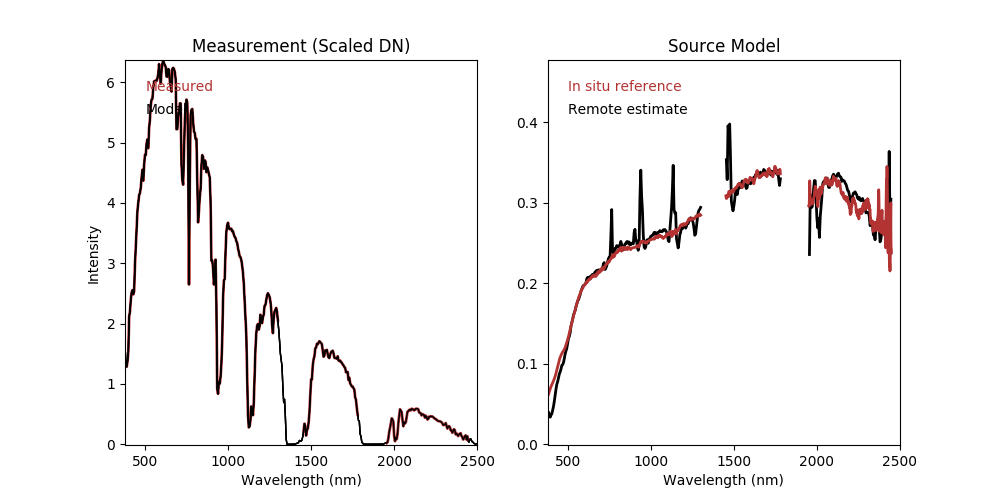

In [15]:
# frame_0
file0 = ''.join([images_dir,"/frame_0.png"])
Image(filename=file0)

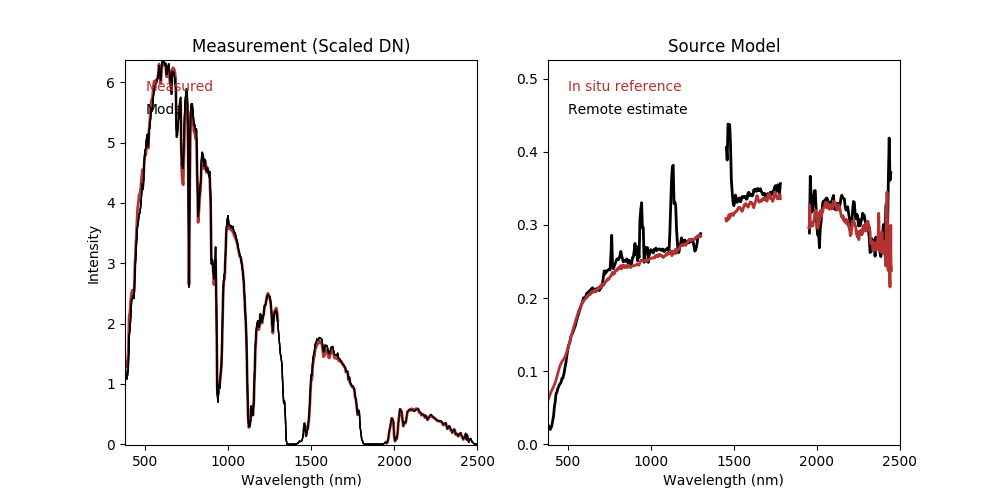

In [16]:
# frame_1
file1 = ''.join([images_dir,"/frame_1.png"])
Image(filename=file1)

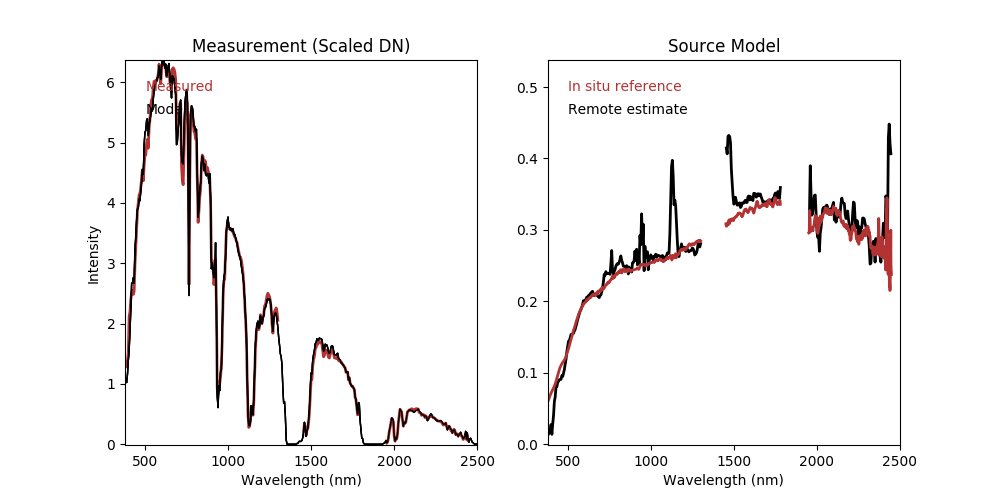

In [17]:
# frame_2
file2 = ''.join([images_dir,"/frame_2.png"])
Image(filename=file2)

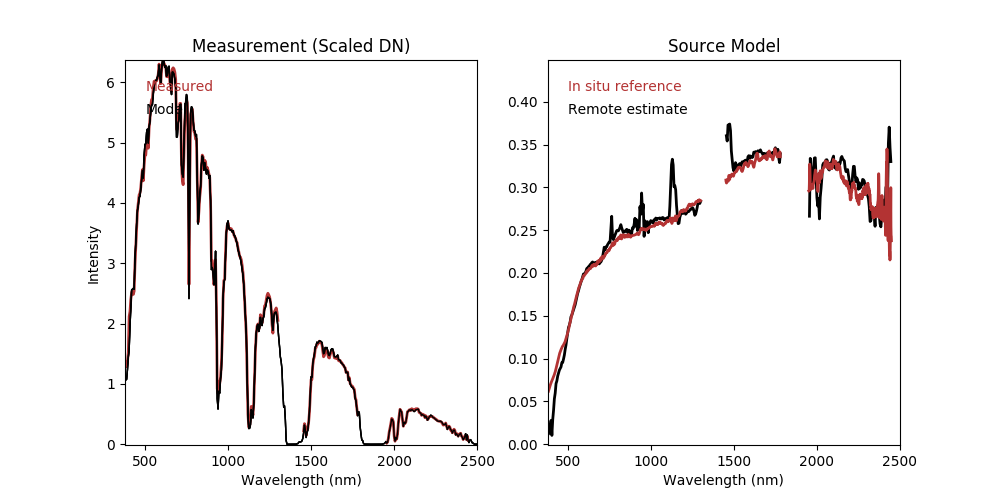

In [18]:
# frame_3
file3 = ''.join([images_dir,"/frame_3.png"])
Image(filename=file3)

In [19]:
# show output frames
images_dir = os.path.join(output_path,'images','beckmanlawn')
print(images_dir)

/Users/sserbin/scratch/isofit_output/images/beckmanlawn


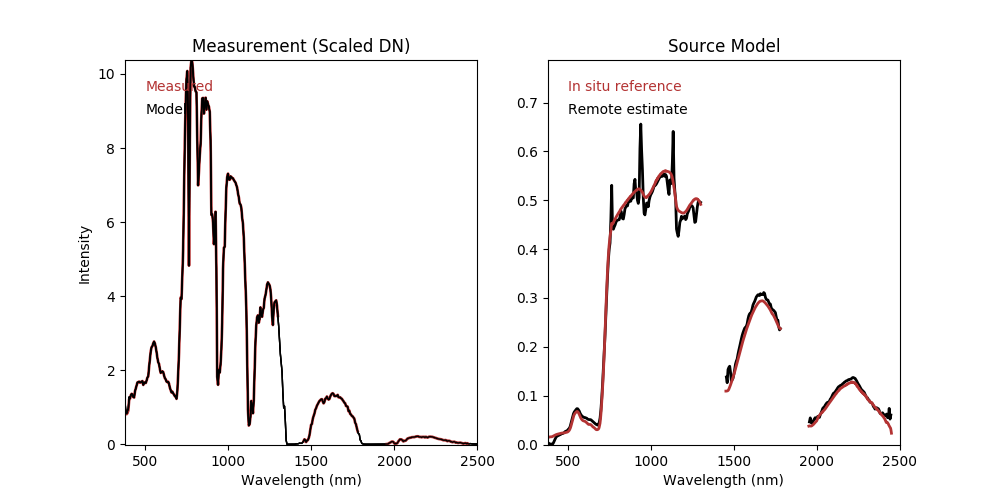

In [20]:
# frame_0
file0 = ''.join([images_dir,"/frame_0.png"])
Image(filename=file0)

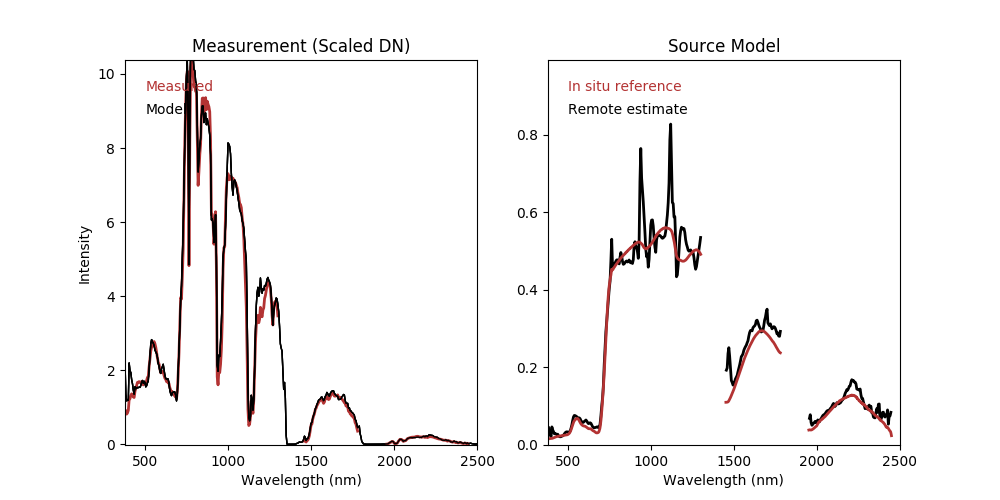

In [21]:
# frame_1
file1 = ''.join([images_dir,"/frame_1.png"])
Image(filename=file1)

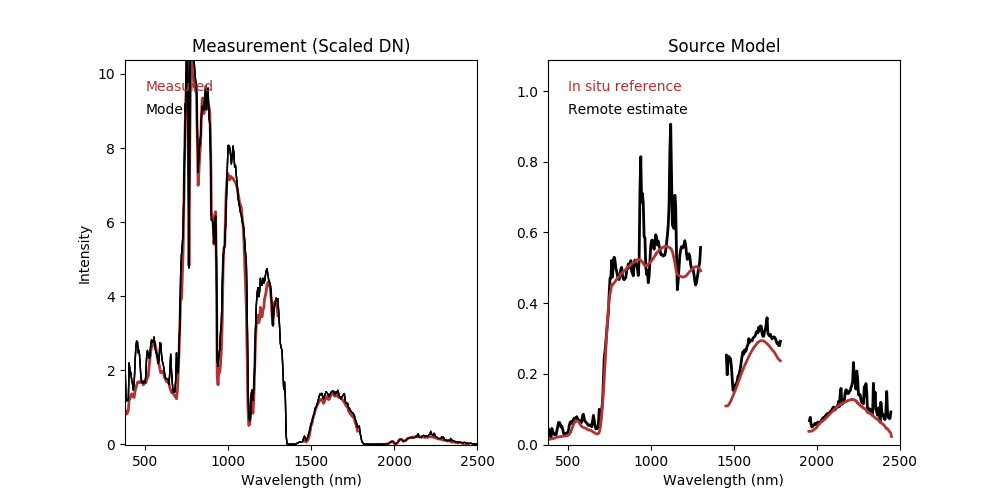

In [22]:
# frame_2
file1 = ''.join([images_dir,"/frame_2.png"])
Image(filename=file1)

In [38]:
# Plot main reflectance output
for files in glob.glob(os.path.join(output_path,"*_rfl_*")):
    f = open( files, 'r' )
    file_contents = f.read()
    print(f.name)
    filename_in = f.name
    f.close()
    
f2 = open(filename_in, 'r') 
lines = f2.readlines()
x = []
y = [] 

for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
f2.close() 
print(y)
print(x)

/Users/sserbin/scratch/isofit_output/ang20171108t184829_rfl_v2p11_horse.txt
/Users/sserbin/scratch/isofit_output/ang20171108t184227_rfl_v2p11_BeckmanLawn-libRadTran.txt
[0.038105, 0.014244, 0.009975, 0.006543, 0.006049, 0.011045, 0.008383, 0.009814, 0.010199, 0.012682, 0.015103, 0.017523, 0.019821, 0.021215, 0.022242, 0.023146, 0.023996, 0.024919, 0.024385, 0.024782, 0.025461, 0.026449, 0.02704, 0.027864, 0.029291, 0.031646, 0.033932, 0.038276, 0.045085, 0.051915, 0.059246, 0.064773, 0.067934, 0.069588, 0.071119, 0.07251, 0.072238, 0.070822, 0.068711, 0.065027, 0.06151, 0.059365, 0.058054, 0.057566, 0.056949, 0.057082, 0.056071, 0.054643, 0.053018, 0.05188, 0.051185, 0.050853, 0.050439, 0.049452, 0.048244, 0.046561, 0.044825, 0.042877, 0.041475, 0.041066, 0.040849, 0.042363, 0.046842, 0.055501, 0.071828, 0.095685, 0.124044, 0.15518, 0.188985, 0.227792, 0.267922, 0.309094, 0.346213, 0.379999, 0.405722, 0.423784, 0.428827, 0.437296, 0.45185, 0.458393, 0.462993, 0.465796, 0.466655, 0.4702

In [35]:
import numpy as np

for files in glob.glob(os.path.join(output_path,"*_rfl_*")):
    print(files)
    
    data = np.loadtxt(fname=files, delimiter='\s')

/Users/sserbin/scratch/isofit_output/ang20171108t184829_rfl_v2p11_horse.txt


ValueError: could not convert string to float: '376.860000   0.028599'

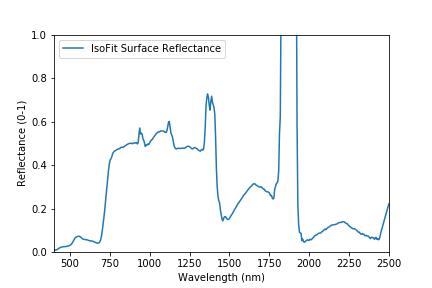

In [28]:
# Plot main reflectance output
plt.plot(x,y)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (0-1)')
plt.axis([400, 2500, 0, 1])
plt.legend(['IsoFit Surface Reflectance'])
#plt.show()
plt.savefig(''.join([output_path,'isofit_reflectance.png']))
plt.close(fig='all')

refl = ''.join([output_path,"/isofit_reflectance.png"])
Image(filename=refl)

/Users/sserbin/scratch/isofit_output/ang20171108t184829_mdl_v2p11_horse.txt


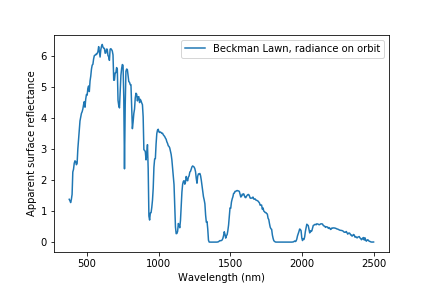

In [12]:
for files in glob.glob(os.path.join(output_path,"*_mdl_*")):
    f = open( files, 'r' )
    file_contents = f.read()
    print(f.name)
    filename_in = f.name
    f.close()
    
f2 = open(filename_in, 'r') 
lines = f2.readlines()
x = []
y = [] 
for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
f2.close() 

plt.plot(x,y)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Apparent surface reflectance')
plt.legend(['Beckman Lawn, radiance on orbit'])
#plt.show()
plt.savefig(''.join([output_path,'isofit_radiance.png']))
plt.close(fig='all')

radiance = ''.join([output_path,'/isofit_radiance.png'])
Image(filename=radiance)